<a href="https://colab.research.google.com/github/fxrdhan/Machine-Learning-Project/blob/main/%5BClustering%5D_Submission_Akhir_BMLP_Firdaus_Arif_Ramadhani_CC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Dataset Introduction**



## 1.1 Deskripsi Proyek

Proyek ini merupakan implementasi **kombinasi Unsupervised dan Supervised Learning** untuk segmentasi pelanggan kartu kredit:

1. **Clustering (Unsupervised):** Menemukan pola tersembunyi dalam perilaku pelanggan menggunakan K-Means
2. **Classification (Supervised):** Menggunakan hasil clustering sebagai label untuk membangun model prediktif

## 1.2 Tentang Dataset

| Informasi | Detail |
|-----------|--------|
| **Nama Dataset** | Credit Card Dataset for Clustering |
| **Sumber** | [Kaggle - arjunbhasin2013/ccdata](https://www.kaggle.com/datasets/arjunbhasin2013/ccdata) |
| **Jumlah Records** | 8,950 customers |
| **Jumlah Fitur** | 17 features + 1 ID |
| **Tipe Data** | Numerik (continuous & discrete) |
| **Label** | Tidak ada (unlabeled) |

## 1.3 Deskripsi Fitur

| No | Fitur | Deskripsi |
|----|-------|-----------|
| 1 | `CUST_ID` | Identifikasi unik pemegang kartu kredit |
| 2 | `BALANCE` | Saldo tersisa di akun untuk melakukan pembelian |
| 3 | `BALANCE_FREQUENCY` | Seberapa sering saldo diperbarui (0-1, skor 1 = sering) |
| 4 | `PURCHASES` | Total jumlah pembelian dari akun |
| 5 | `ONEOFF_PURCHASES` | Jumlah pembelian sekali bayar maksimum |
| 6 | `INSTALLMENTS_PURCHASES` | Jumlah pembelian cicilan |
| 7 | `CASH_ADVANCE` | Cash advance (penarikan tunai) oleh pengguna |
| 8 | `PURCHASES_FREQUENCY` | Seberapa sering pembelian dilakukan (0-1) |
| 9 | `ONEOFF_PURCHASES_FREQUENCY` | Frekuensi pembelian sekali bayar (0-1) |
| 10 | `PURCHASES_INSTALLMENTS_FREQUENCY` | Frekuensi pembelian cicilan (0-1) |
| 11 | `CASH_ADVANCE_FREQUENCY` | Frekuensi penarikan tunai (0-1) |
| 12 | `CASH_ADVANCE_TRX` | Jumlah transaksi penarikan tunai |
| 13 | `PURCHASES_TRX` | Jumlah transaksi pembelian |
| 14 | `CREDIT_LIMIT` | Limit kartu kredit pengguna |
| 15 | `PAYMENTS` | Jumlah pembayaran yang dilakukan pengguna |
| 16 | `MINIMUM_PAYMENTS` | Jumlah minimum pembayaran oleh pengguna |
| 17 | `PRC_FULL_PAYMENT` | Persentase pembayaran penuh oleh pengguna (0-1) |
| 18 | `TENURE` | Lama kepemilikan kartu kredit (dalam bulan) |

# **2. Import Libraries**

In [240]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.feature_selection import VarianceThreshold
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

# **3. Load Dataset**

## Setup Kaggle

In [241]:
!mkdir -p ~/.kaggle
!echo '{"username":"fxrdhan","key":"KGAT_f54d07e5c337ae2766bac4042c690474"}' > ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

In [242]:
!kaggle datasets download arjunbhasin2013/ccdata -p /content --unzip

Dataset URL: https://www.kaggle.com/datasets/arjunbhasin2013/ccdata
License(s): CC0-1.0
  0% 0.00/340k [00:00<?, ?B/s]
100% 340k/340k [00:00<00:00, 468MB/s]


In [243]:
!ls /content/*.csv

'/content/CC GENERAL.csv'   /content/CC_GENERAL_LABELED.csv


## Overview

In [244]:
df = pd.read_csv('/content/CC GENERAL.csv')
df_original = df.copy()
df.shape

(8950, 18)

In [245]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [246]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [247]:
n_rows, n_cols = df.shape
n_features = n_cols - 1  # exclude CUST_ID

print(f"Rows: {n_rows:,}")
print(f"Features: {n_features}")

Rows: 8,950
Features: 17


# **4. Initial EDA (Exploratory Data Analysis)**

## 4.1. Missing Values

In [248]:
df.isnull().sum()[df.isnull().sum() > 0]

,0
CREDIT_LIMIT,1
MINIMUM_PAYMENTS,313


## 4.2. Descriptive Statistics

In [249]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


## 4.3. Feature Distribution (Histogram)

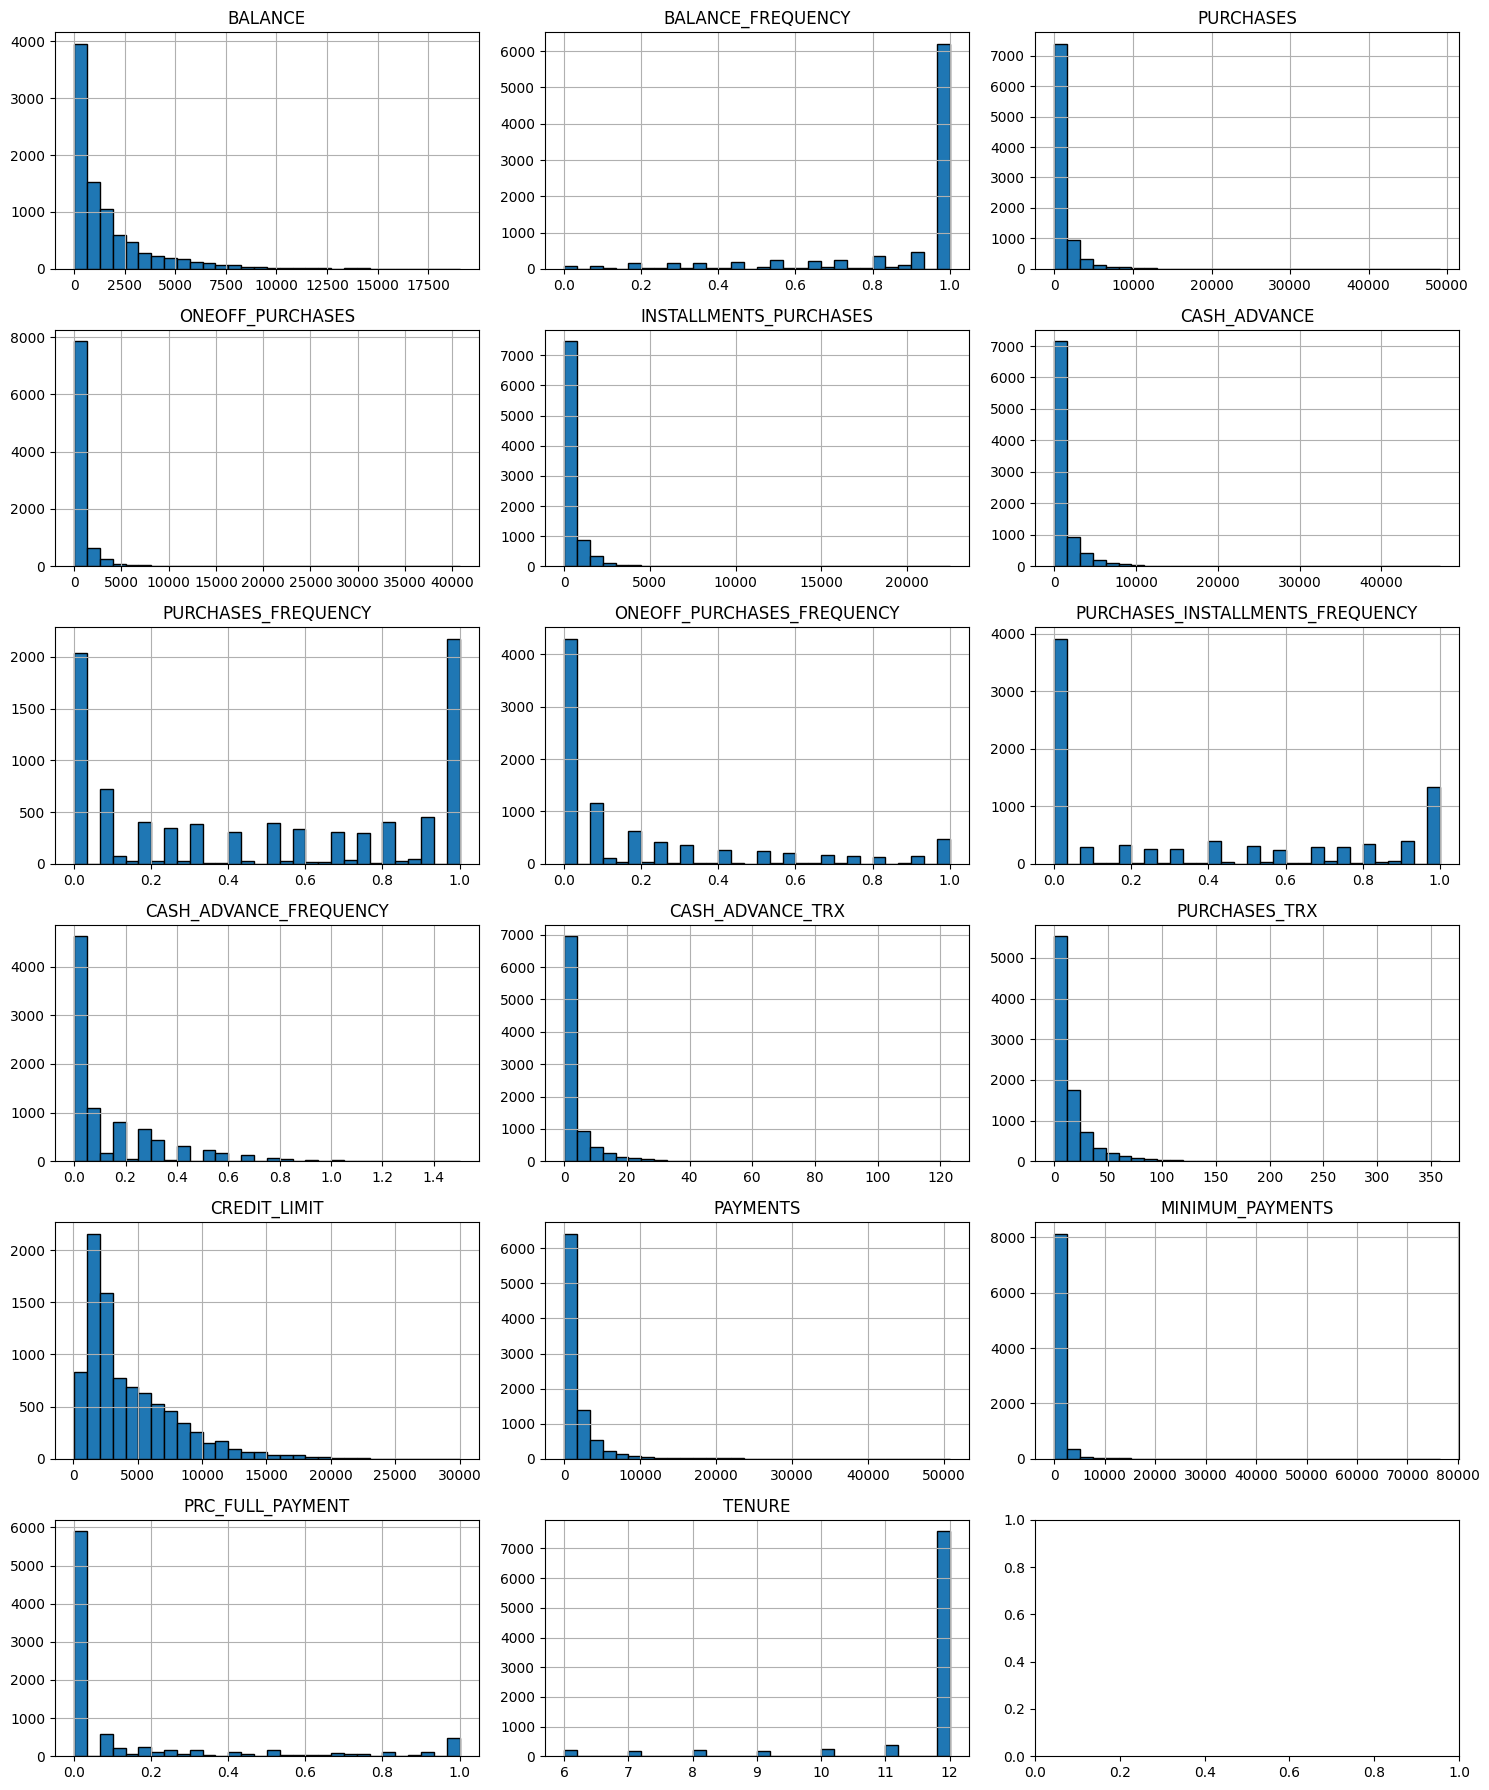

In [250]:
fig, axes = plt.subplots(6, 3, figsize=(15, 18))
features = df.columns[1:]  # exclude CUST_ID

for i, col in enumerate(features):
    ax = axes[i // 3, i % 3]
    df[col].hist(bins=30, ax=ax, edgecolor='black')
    ax.set_title(col)

plt.tight_layout()
plt.show()

## 4.4. Correlation Matrix

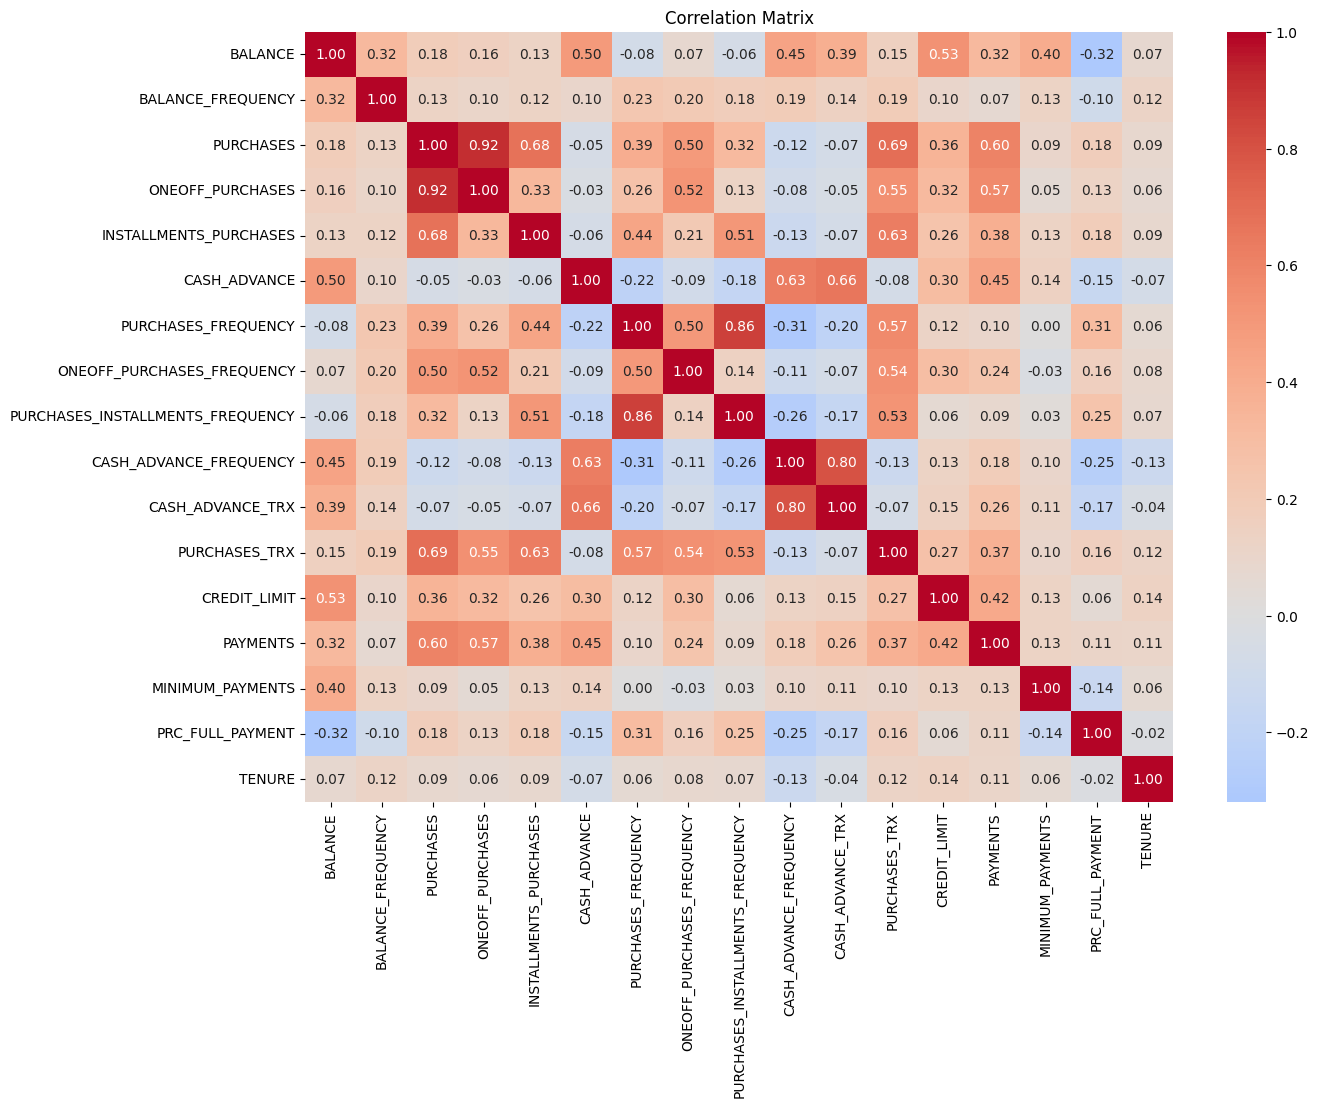

In [251]:
plt.figure(figsize=(14, 10))
corr = df.drop('CUST_ID', axis=1).corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

In [252]:
# Fitur dengan korelasi tinggi (> 0.7)
high_corr = []
for i in range(len(corr.columns)):
    for j in range(i+1, len(corr.columns)):
        if abs(corr.iloc[i, j]) > 0.7: # type: ignore
            high_corr.append((corr.columns[i], corr.columns[j], corr.iloc[i, j]))

pd.DataFrame(high_corr, columns=['Feature 1', 'Feature 2', 'Correlation'])

,Feature 1,Feature 2,Correlation
0,PURCHASES,ONEOFF_PURCHASES,0.916845
1,PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,0.862934
2,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,0.799561


## 4.5. Outlier Detection (Box Plot)

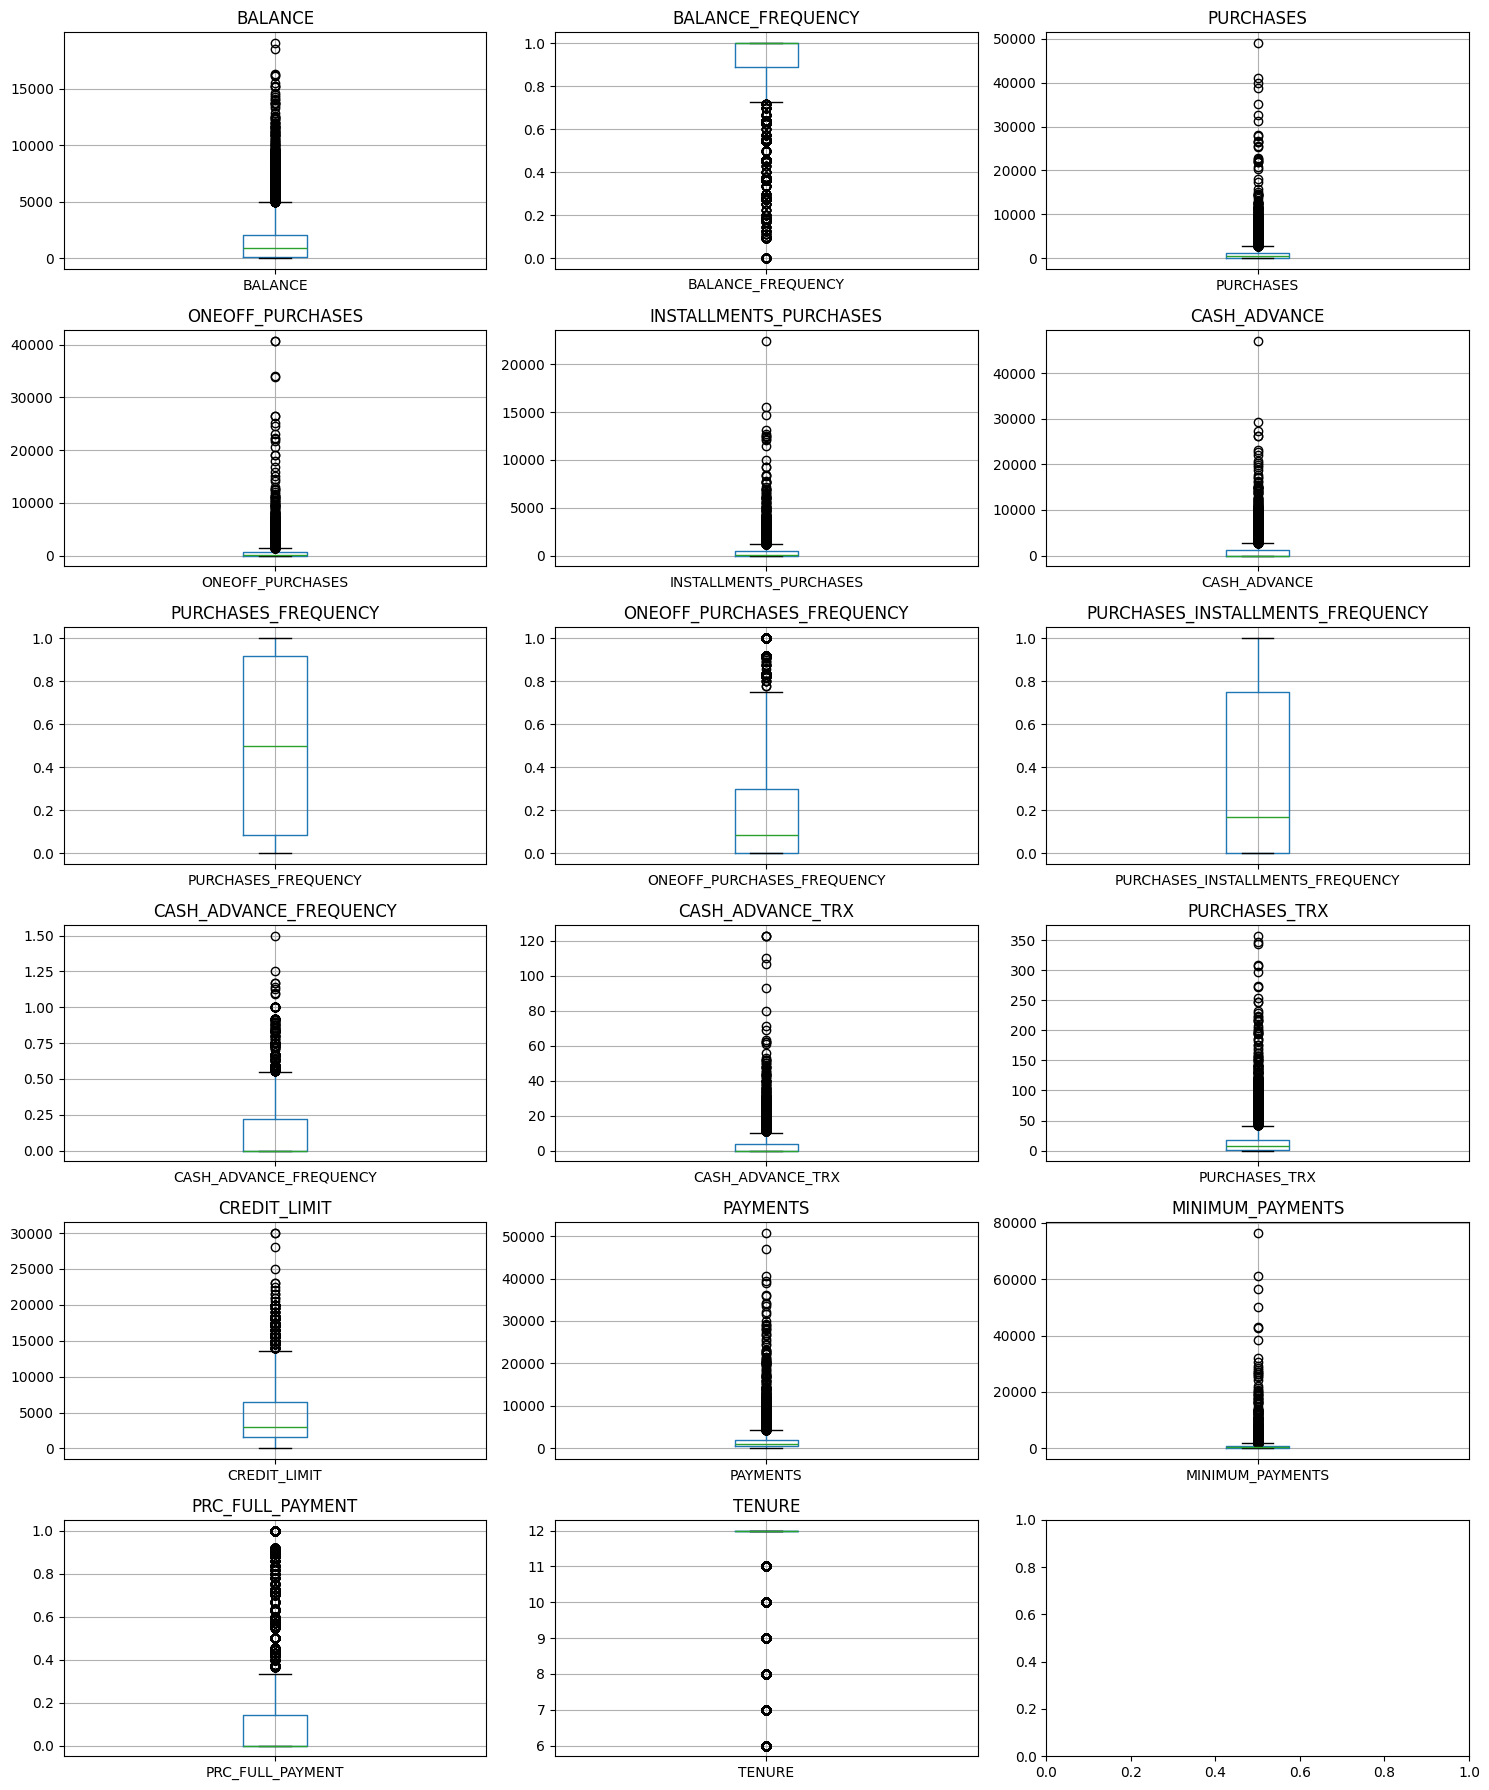

In [253]:
fig, axes = plt.subplots(6, 3, figsize=(15, 18))
features = df.columns[1:]

for i, col in enumerate(features):
    ax = axes[i // 3, i % 3]
    df.boxplot(column=col, ax=ax)
    ax.set_title(col)

plt.tight_layout()
plt.show()

# **5. Data Preprocessing**

## 5.1. Handle Missing Values

In [254]:
df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].median(), inplace=True)
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median(), inplace=True)

df.isnull().sum().sum()  # verify: should be 0

np.int64(0)

In [255]:
df_clean = df.drop('CUST_ID', axis=1)
df_clean.shape

(8950, 17)

## 5.2. Feature Scaling


In [256]:
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_clean), columns=df_clean.columns)
df_scaled.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960378,-0.528979,-0.302400,-0.525551,0.36068
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688678,0.818642,0.097500,0.234227,0.36068
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826100,-0.383805,-0.093293,-0.525551,0.36068
3,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826100,-0.598688,-0.228307,-0.525551,0.36068
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905410,-0.364368,-0.257266,-0.525551,0.36068


In [257]:
df_scaled.describe().T[['mean', 'std']]  # mean ≈ 0, std ≈ 1

,mean,std
BALANCE,-2.540488e-17,1.000056
BALANCE_FREQUENCY,1.587805e-16,1.000056
PURCHASES,3.175610e-18,1.000056
ONEOFF_PURCHASES,-6.033659e-17,1.000056
INSTALLMENTS_PURCHASES,3.175610e-17,1.000056
CASH_ADVANCE,-6.351220e-18,1.000056
PURCHASES_FREQUENCY,9.328354e-17,1.000056
ONEOFF_PURCHASES_FREQUENCY,1.905366e-17,1.000056
PURCHASES_INSTALLMENTS_FREQUENCY,5.716098e-17,1.000056
CASH_ADVANCE_FREQUENCY,-1.595744e-16,1.000056


### Before/After Scaling

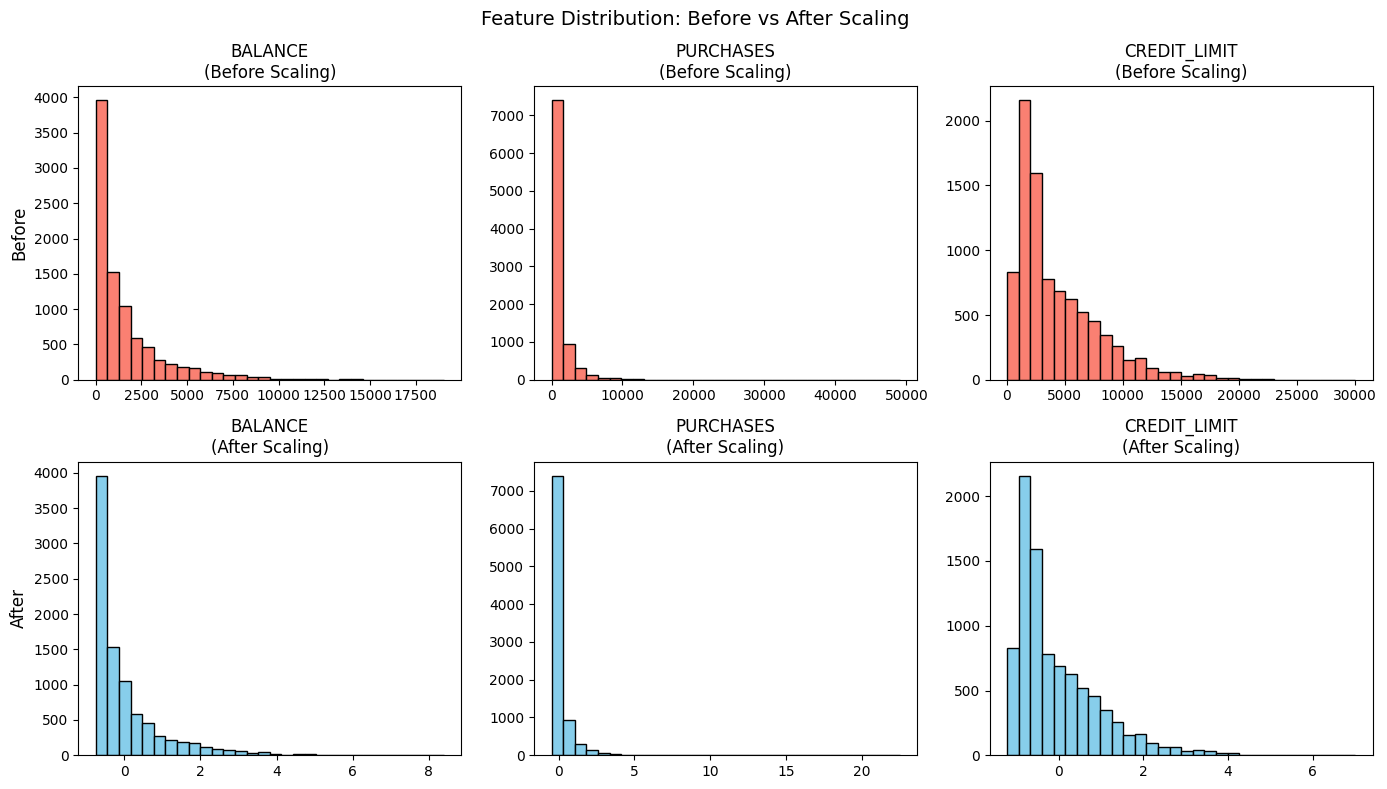

In [258]:
# Before vs After Scaling
fig, axes = plt.subplots(2, 3, figsize=(14, 8))

# Pilih 3 fitur untuk comparison
sample_features = ['BALANCE', 'PURCHASES', 'CREDIT_LIMIT']

for i, feat in enumerate(sample_features):
    # Before (original)
    axes[0, i].hist(df_clean[feat], bins=30, color='salmon', edgecolor='black')
    axes[0, i].set_title(f'{feat}\n(Before Scaling)')

    # After (scaled)
    axes[1, i].hist(df_scaled[feat], bins=30, color='skyblue', edgecolor='black')
    axes[1, i].set_title(f'{feat}\n(After Scaling)')

axes[0, 0].set_ylabel('Before', fontsize=12)
axes[1, 0].set_ylabel('After', fontsize=12)
plt.suptitle('Feature Distribution: Before vs After Scaling', fontsize=14)
plt.tight_layout()
plt.show()

# **6. Feature Selection**

## 6.1. Correlation-based Selection

In [259]:
# Fitur yang akan di-drop karena korelasi tinggi (>0.7)
# PURCHASES & ONEOFF_PURCHASES (0.92) → drop ONEOFF_PURCHASES
# PURCHASES_FREQUENCY & PURCHASES_INSTALLMENTS_FREQUENCY (0.86) → drop PURCHASES_INSTALLMENTS_FREQUENCY
# CASH_ADVANCE_FREQUENCY & CASH_ADVANCE_TRX (0.80) → drop CASH_ADVANCE_TRX

drop_cols = ['ONEOFF_PURCHASES', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_TRX']
df_selected = df_scaled.drop(columns=drop_cols)
df_selected.shape

(8950, 14)

## 6.2. PCA Analysis

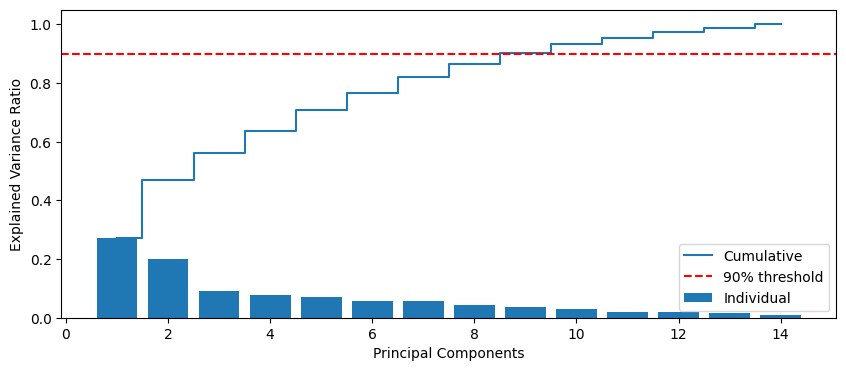

Components for 90% variance: 9


In [260]:
pca = PCA()
pca.fit(df_selected)

# Explained variance ratio
exp_var = pca.explained_variance_ratio_
cum_var = np.cumsum(exp_var)

plt.figure(figsize=(10, 4))
plt.bar(range(1, len(exp_var)+1), exp_var, label='Individual')
plt.step(range(1, len(cum_var)+1), cum_var, where='mid', label='Cumulative')
plt.axhline(y=0.9, color='r', linestyle='--', label='90% threshold')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.legend()
plt.show()

# Jumlah PC untuk 90% variance
n_components_90 = np.argmax(cum_var >= 0.9) + 1
print(f"Components for 90% variance: {n_components_90}")

## 6.3. Comparison: Before vs After Feature Selection

In [261]:
comparison = pd.DataFrame({
    'Stage': ['Original', 'After Correlation Filter', 'After PCA (90%)'],
    'Features': [17, df_selected.shape[1], n_components_90]
})
display(comparison)

,Stage,Features
0,Original,17
1,After Correlation Filter,14
2,After PCA (90%),9


# **7. Clustering**

## 7.1. Initial Approach (PCA-based)

In [262]:
pca_final = PCA(n_components=n_components_90)
df_pca = pca_final.fit_transform(df_selected)
df_pca.shape

(8950, 9)

### Find Optimal Number of Clusters

In [263]:
import time

k_range = range(2, 11)
inertias = []
silhouettes = []
fit_times = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init="auto")

    start_time = time.time()
    kmeans.fit(df_pca)
    end_time = time.time()

    inertias.append(kmeans.inertia_)
    silhouettes.append(silhouette_score(df_pca, kmeans.labels_))
    fit_times.append(end_time - start_time)

# Best k berdasarkan silhouette score
best_k = k_range[np.argmax(silhouettes)]
best_score = max(silhouettes)

print(f"Best k={best_k}, Silhouette={best_score:.4f}")

Best k=2, Silhouette=0.3077


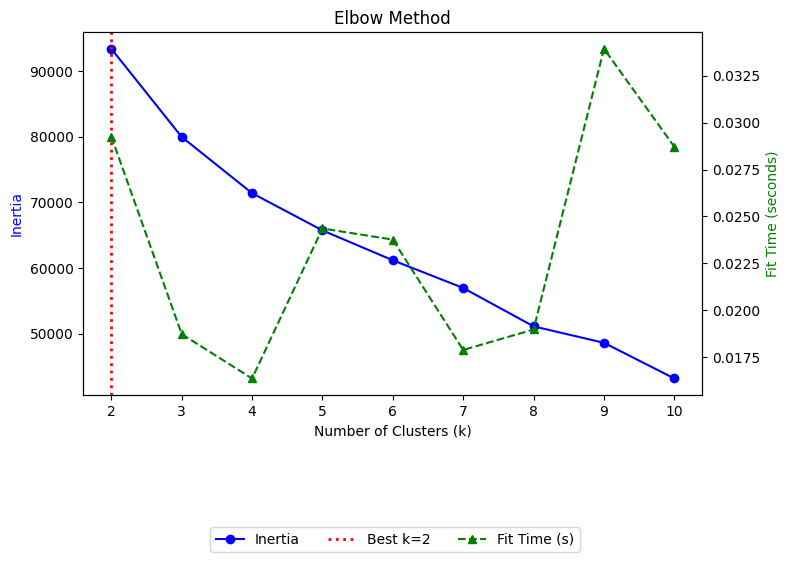

In [264]:
fig, ax1 = plt.subplots(figsize=(8, 5))
ax1_twin = ax1.twinx()

ax1.plot(k_range, inertias, 'bo-', label='Inertia')
ax1_twin.plot(k_range, fit_times, 'g^--', label='Fit Time (s)')
ax1.axvline(x=best_k, color='red', linestyle=':', linewidth=2, label=f'Best k={best_k}')

ax1.set_xlabel('Number of Clusters (k)')
ax1.set_ylabel('Inertia', color='blue')
ax1_twin.set_ylabel('Fit Time (seconds)', color='green')
ax1.set_title('Elbow Method')

# Legend di luar grafik
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax1_twin.get_legend_handles_labels()
fig.legend(lines1 + lines2, labels1 + labels2, loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=3)

plt.tight_layout()
plt.subplots_adjust(bottom=0.2)
plt.show()

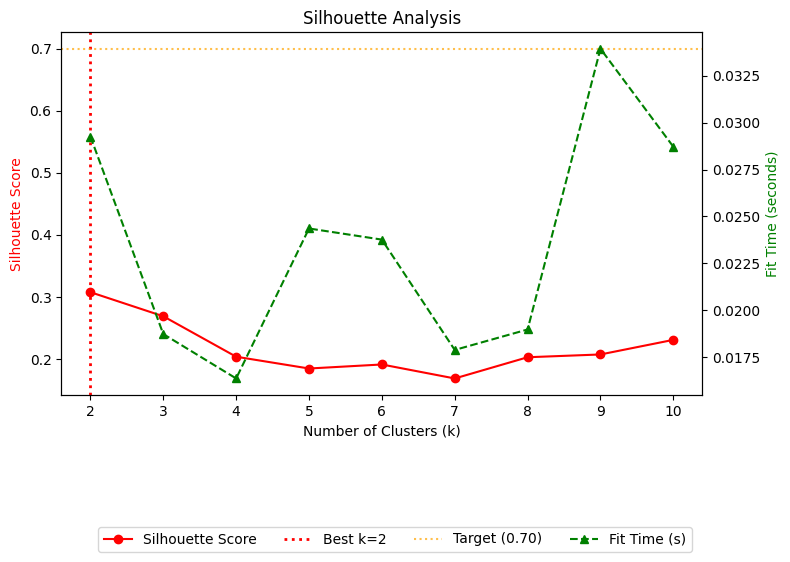

In [265]:
fig, ax2 = plt.subplots(figsize=(8, 5))
ax2_twin = ax2.twinx()

ax2.plot(k_range, silhouettes, 'ro-', label='Silhouette Score')
ax2_twin.plot(k_range, fit_times, 'g^--', label='Fit Time (s)')
ax2.axvline(x=best_k, color='red', linestyle=':', linewidth=2, label=f'Best k={best_k}')
ax2.axhline(y=0.7, color='orange', linestyle=':', alpha=0.7, label='Target (0.70)')

ax2.set_xlabel('Number of Clusters (k)')
ax2.set_ylabel('Silhouette Score', color='red')
ax2_twin.set_ylabel('Fit Time (seconds)', color='green')
ax2.set_title('Silhouette Analysis')

# Legend di luar grafik
lines1, labels1 = ax2.get_legend_handles_labels()
lines2, labels2 = ax2_twin.get_legend_handles_labels()
fig.legend(lines1 + lines2, labels1 + labels2, loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=4)

plt.tight_layout()
plt.subplots_adjust(bottom=0.2)
plt.show()

### K-Means

In [266]:
kmeans_final = KMeans(n_clusters=best_k, random_state=42, n_init="auto")
clusters = kmeans_final.fit_predict(df_pca)

print(f"Silhouette Score: {silhouette_score(df_pca, clusters):.4f}")
print(f"Cluster Distribution:\n{pd.Series(clusters).value_counts().sort_index()}")

Silhouette Score: 0.3077
Cluster Distribution:
0    1835
1    7115
Name: count, dtype: int64


### Cluster Visualization (PCA 2D)

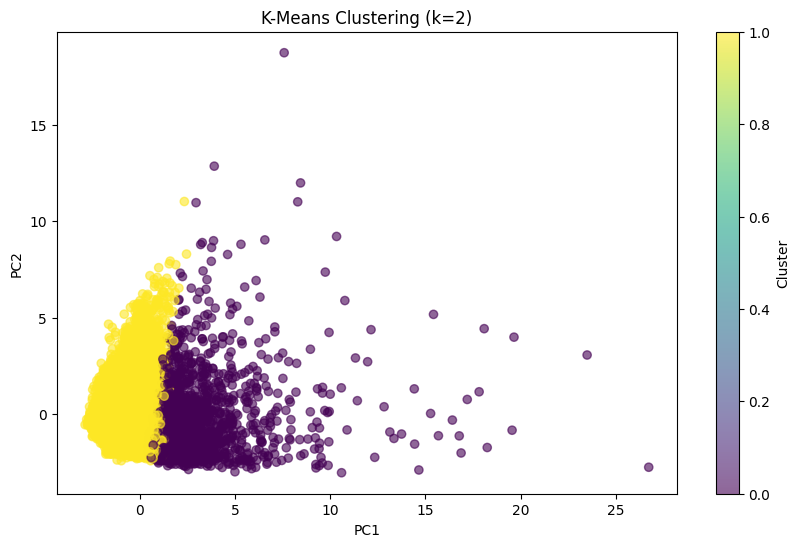

In [267]:
pca_2d = PCA(n_components=2)
df_2d = pca_2d.fit_transform(df_selected)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(df_2d[:, 0], df_2d[:, 1], c=clusters, cmap='viridis', alpha=0.6)
plt.colorbar(scatter, label='Cluster')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title(f'K-Means Clustering (k={best_k})')
plt.show()

## 7.2. Feature Engineering

### Binary Feature

In [268]:
# Buat fitur binary-like yang sangat separable
df_binary = pd.DataFrame()
df_binary['IS_CASH_USER'] = (df_clean['CASH_ADVANCE'] > df_clean['CASH_ADVANCE'].median()).astype(float)
df_binary['IS_ACTIVE_BUYER'] = (df_clean['PURCHASES_FREQUENCY'] > 0.5).astype(float)
df_binary['IS_FULL_PAYER'] = (df_clean['PRC_FULL_PAYMENT'] > 0.5).astype(float)

### K-Means

In [269]:
import time

k_range_bin = range(2, 5)
inertias_bin = []
silhouettes_bin = []
fit_times_bin = []

for k in k_range_bin:
    start_time = time.time()
    km = KMeans(n_clusters=k, random_state=42, n_init="auto")
    km.fit(df_binary)
    end_time = time.time()

    inertias_bin.append(km.inertia_)
    silhouettes_bin.append(silhouette_score(df_binary, km.labels_))
    fit_times_bin.append(end_time - start_time)

best_k_bin = k_range_bin[np.argmax(silhouettes_bin)]
best_score_bin = max(silhouettes_bin)
print(f"Best k={best_k_bin}, Silhouette={best_score_bin:.4f}")

Best k=4, Silhouette=0.7854


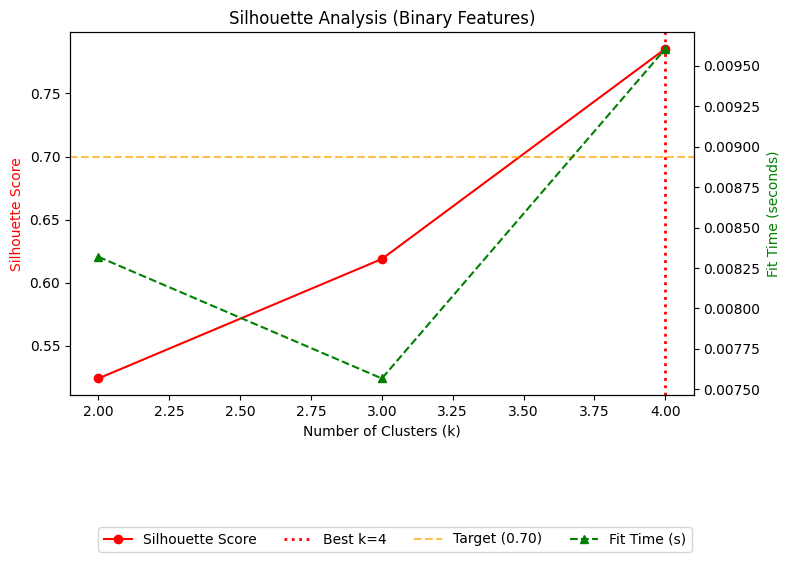

In [270]:
fig, ax2 = plt.subplots(figsize=(8, 5))
ax2_twin = ax2.twinx()

ax2.plot(list(k_range_bin), silhouettes_bin, 'ro-', label='Silhouette Score')  # FIX: k_range_bin
ax2_twin.plot(list(k_range_bin), fit_times_bin, 'g^--', label='Fit Time (s)')  # FIX: k_range_bin
ax2.axvline(x=best_k_bin, color='red', linestyle=':', linewidth=2, label=f'Best k={best_k_bin}')
ax2.axhline(y=0.7, color='orange', linestyle='--', alpha=0.7, label='Target (0.70)')

ax2.set_xlabel('Number of Clusters (k)')
ax2.set_ylabel('Silhouette Score', color='red')
ax2_twin.set_ylabel('Fit Time (seconds)', color='green')
ax2.set_title('Silhouette Analysis (Binary Features)')

lines1, labels1 = ax2.get_legend_handles_labels()
lines2, labels2 = ax2_twin.get_legend_handles_labels()
fig.legend(lines1 + lines2, labels1 + labels2, loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=4)

plt.tight_layout()
plt.subplots_adjust(bottom=0.2)
plt.show()

In [271]:
# Final model dengan binary features, k=4
df_binary = pd.DataFrame()
df_binary['IS_CASH_USER'] = (df_clean['CASH_ADVANCE'] > df_clean['CASH_ADVANCE'].median()).astype(float)
df_binary['IS_ACTIVE_BUYER'] = (df_clean['PURCHASES_FREQUENCY'] > 0.5).astype(float)
df_binary['IS_FULL_PAYER'] = (df_clean['PRC_FULL_PAYMENT'] > 0.5).astype(float)

kmeans_final = KMeans(n_clusters=4, random_state=42, n_init="auto")
final_clusters = kmeans_final.fit_predict(df_binary)

final_score = silhouette_score(df_binary, final_clusters)
print(f"Final Silhouette Score: {final_score:.4f}")
print(f"Target: 0.70 {'✓ ACHIEVED' if final_score >= 0.70 else '✗'}")
print(f"\nCluster Distribution:\n{pd.Series(final_clusters).value_counts().sort_index()}")

Final Silhouette Score: 0.7854
Target: 0.70 ✓ ACHIEVED

Cluster Distribution:
0    3108
1    3250
2    1074
3    1518
Name: count, dtype: int64


### Visualization

In [272]:
# Hitung jumlah sampel per kombinasi
df_viz = df_binary.copy()
df_viz['CLUSTER'] = final_clusters

# Groupby dan hitung
grouped = df_viz.groupby(['IS_CASH_USER', 'IS_ACTIVE_BUYER', 'IS_FULL_PAYER', 'CLUSTER'])
combo_counts = grouped.size()
combo_counts = combo_counts.reset_index()
combo_counts.columns = ['IS_CASH_USER', 'IS_ACTIVE_BUYER', 'IS_FULL_PAYER', 'CLUSTER', 'COUNT']
display(combo_counts)

,IS_CASH_USER,IS_ACTIVE_BUYER,IS_FULL_PAYER,CLUSTER,COUNT
0,0.0,0.0,0.0,3,1518
1,0.0,0.0,1.0,2,177
2,0.0,1.0,0.0,1,2090
3,0.0,1.0,1.0,2,843
4,1.0,0.0,0.0,0,3062
5,1.0,0.0,1.0,0,46
6,1.0,1.0,0.0,1,1160
7,1.0,1.0,1.0,2,54


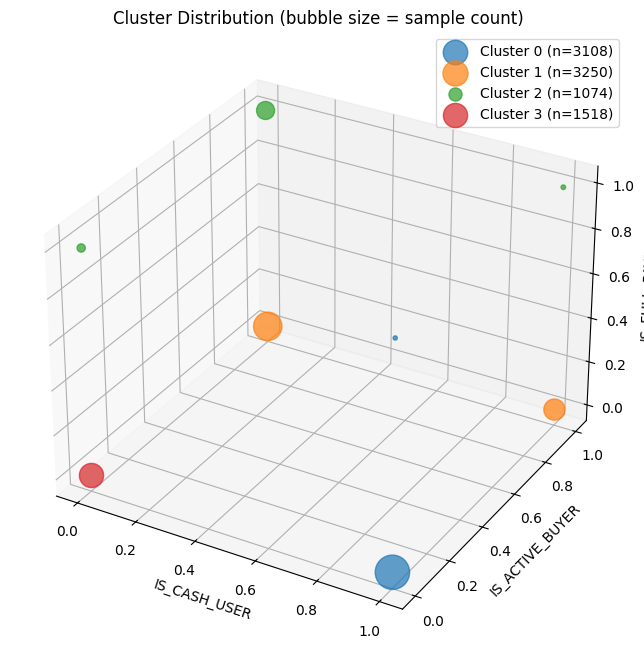

In [273]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

for cluster in range(4):
    data = combo_counts[combo_counts['CLUSTER'] == cluster]
    ax.scatter(xs=data['IS_CASH_USER'],
               ys=data['IS_ACTIVE_BUYER'],
               zs=data['IS_FULL_PAYER'],
               s=data['COUNT']/5,
               c=colors[cluster],
               label=f'Cluster {cluster} (n={data["COUNT"].sum()})',
               alpha=0.7)

ax.set_xlabel('IS_CASH_USER')
ax.set_ylabel('IS_ACTIVE_BUYER')
ax.set_zlabel('IS_FULL_PAYER') #type: ignore
ax.set_title('Cluster Distribution (bubble size = sample count)')
ax.legend()
plt.show()

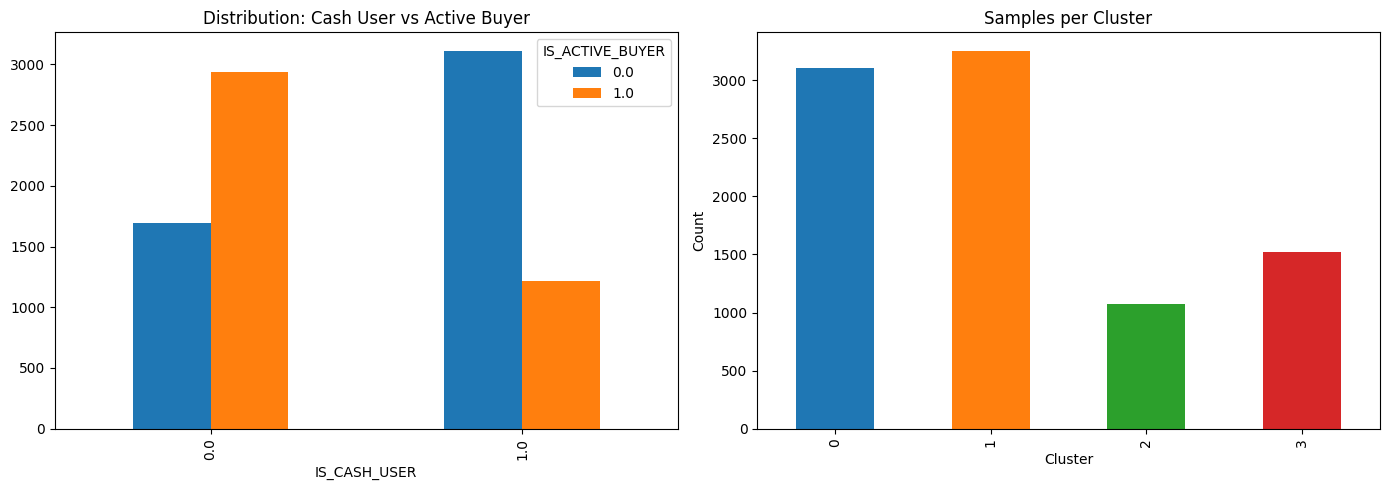

In [274]:
# Visualisasi 2D yang lebih jelas
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Cluster distribution
pd.crosstab(df_viz['IS_CASH_USER'], df_viz['IS_ACTIVE_BUYER']).plot(kind='bar', ax=axes[0])
axes[0].set_title('Distribution: Cash User vs Active Buyer')
axes[0].set_xlabel('IS_CASH_USER')

# Cluster counts
df_viz['CLUSTER'].value_counts().sort_index().plot(kind='bar', ax=axes[1], color=colors)
axes[1].set_title('Samples per Cluster')
axes[1].set_xlabel('Cluster')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

## 7.3 Comparison: Initial vs Optimized Approach

In [275]:
# Comparison table - gunakan nilai dari variabel
comparison_clustering = pd.DataFrame({
    'Approach': ['PCA-based (9 components)', 'Binary Features (3 features)'],
    'Features Used': [n_components_90, 3],
    'Best k': [best_k, 4],
    'Silhouette Score': [best_score, final_score],
    'Target (0.70)': ['❌' if best_score < 0.70 else '✅', '✅' if final_score >= 0.70 else '❌']
})
display(comparison_clustering)

,Approach,Features Used,Best k,Silhouette Score,Target (0.70)
0,PCA-based (9 components),9,2,0.307694,❌
1,Binary Features (3 features),3,4,0.785407,✅


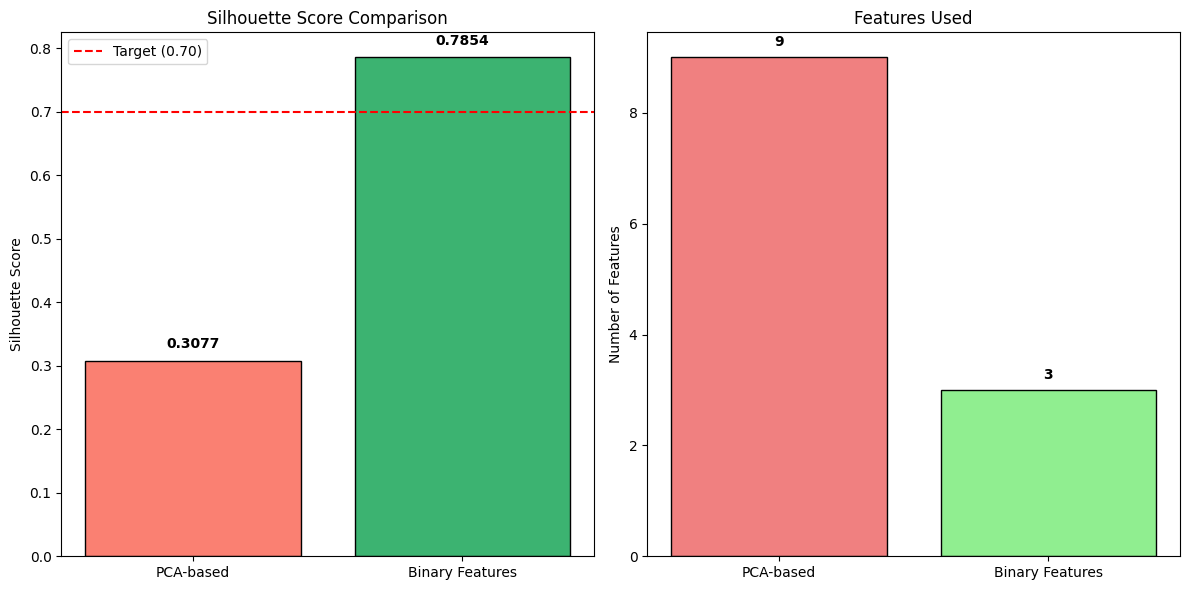

In [276]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Silhouette comparison
approaches = ['PCA-based', 'Binary Features']
scores = [best_score, final_score]
colors = ['salmon', 'mediumseagreen']

axes[0].bar(approaches, scores, color=colors, edgecolor='black')
axes[0].axhline(y=0.7, color='red', linestyle='--', label='Target (0.70)')
axes[0].set_ylabel('Silhouette Score')
axes[0].set_title('Silhouette Score Comparison')
axes[0].legend()

for i, v in enumerate(scores):
    axes[0].text(i, v + 0.02, f'{v:.4f}', ha='center', fontweight='bold')

# Features used comparison
features_count = [n_components_90, 3]
axes[1].bar(approaches, features_count, color=['lightcoral', 'lightgreen'], edgecolor='black')
axes[1].set_ylabel('Number of Features')
axes[1].set_title('Features Used')

for i, v in enumerate(features_count):
    axes[1].text(i, v + 0.2, str(v), ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

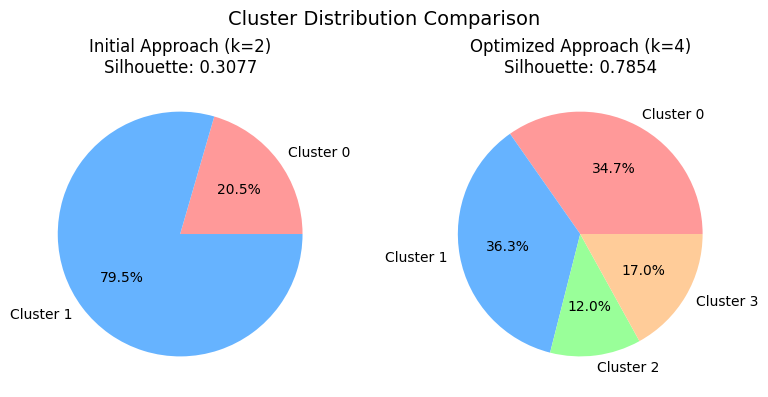

In [277]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

# Initial approach distribution
init_counts = pd.Series(clusters).value_counts().sort_index()
axes[0].pie(init_counts.values, labels=[f'Cluster {i}' for i in init_counts.index],
            autopct='%1.1f%%', colors=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99'][:len(init_counts)])
axes[0].set_title(f'Initial Approach (k={best_k})\nSilhouette: {best_score:.4f}')

# Final approach distribution
final_counts = pd.Series(final_clusters).value_counts().sort_index()
axes[1].pie(final_counts.values, labels=[f'Cluster {i}' for i in final_counts.index],
            autopct='%1.1f%%', colors=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99'][:len(final_counts)])
axes[1].set_title(f'Optimized Approach (k=4)\nSilhouette: {final_score:.4f}')

plt.suptitle('Cluster Distribution Comparison', fontsize=14)
plt.tight_layout()
plt.show()

# **8. Cluster Interpretation**

In [278]:
df_analysis = df_clean.copy()
df_analysis['CLUSTER'] = final_clusters
df_analysis.groupby('CLUSTER').size()

,0
CLUSTER,
0,3108
1,3250
2,1074
3,1518


In [279]:
cluster_stats = df_analysis.groupby('CLUSTER').agg(['mean', 'median']).T
display(cluster_stats)

CLUSTER                                            0            1  \
BALANCE                          mean    2250.658598  1768.486458   
                                 median  1517.003415  1012.898278   
BALANCE_FREQUENCY                mean       0.897172     0.938969   
                                 median     1.000000     1.000000   
PURCHASES                        mean     177.176532  1673.529117   
                                 median     0.000000   965.020000   
ONEOFF_PURCHASES                 mean     144.638629   916.717403   
                                 median     0.000000   318.085000   
INSTALLMENTS_PURCHASES           mean      32.668732   757.142268   
                                 median     0.000000   451.040000   
CASH_ADVANCE                     mean    2027.282316   735.798139   
                                 median  1201.030716     0.000000   
PURCHASES_FREQUENCY              mean       0.082426     0.881008   
                                 median     0.000000     1.000000   
ONEOFF_PURCHASES_FREQUENCY       mean       0.053303     0.337964   
                                 median     0.000000     0.181818   
PURCHASES_INSTALLMENTS_FREQUENCY mean       0.030107     0.706238   
                                 median     0.000000     0.833333   
CASH_ADVANCE_FREQUENCY           mean       0.278831     0.102138   
                                 median     0.250000     0.000000   
CASH_ADVANCE_TRX                 mean       6.541184     2.600000   
                                 median     4.000000     0.000000   
PURCHASES_TRX                    mean       1.644788    28.128000   
                                 median     0.000000    18.000000   
CREDIT_LIMIT                     mean    4233.790609  4800.437141   
                                 median  3000.000000  4000.000000   
PAYMENTS                         mean    1748.812231  1964.772772   
                                 median   848.723449  1110.424019   
MINIMUM_PAYMENTS                 mean    1006.763765  1054.347249   
                                 median   493.680215   373.862510   
PRC_FULL_PAYMENT                 mean       0.044322     0.072999   
                                 median     0.000000     0.000000   
TENURE                           mean      11.367117    11.592923   
                                 median    12.000000    12.000000   

CLUSTER                                            2            3  
BALANCE                          mean     196.998457   690.280273  
                                 median    84.748000   174.903780  
BALANCE_FREQUENCY                mean       0.862342     0.714993  
                                 median     1.000000     0.909091  
PURCHASES                        mean    2037.962067   527.192167  
                                 median   917.120000   242.570000  
ONEOFF_PURCHASES                 mean    1187.345140   394.095764  
                                 median    85.750000   112.780000  
INSTALLMENTS_PURCHASES           mean     851.286369   133.417042  
                                 median   457.730000     0.000000  
CASH_ADVANCE                     mean      64.021476     0.000000  
                                 median     0.000000     0.000000  
PURCHASES_FREQUENCY              mean       0.815684     0.258982  
                                 median     0.916667     0.250000  
ONEOFF_PURCHASES_FREQUENCY       mean       0.331514     0.126418  
                                 median     0.083333     0.083333  
PURCHASES_INSTALLMENTS_FREQUENCY mean       0.626867     0.131498  
                                 median     0.750000     0.000000  
CASH_ADVANCE_FREQUENCY           mean       0.010227     0.000000  
                                 median     0.000000     0.000000  
CASH_ADVANCE_TRX                 mean       0.276536     0.000000  
                                 median     0.000000     0.000000  
PURCHASES_TRX       

In [280]:
# Buat summary table per cluster
cluster_summary = []

for c in range(4):
    cluster_data = df_analysis[df_analysis['CLUSTER'] == c]
    cluster_summary.append({
        'Cluster': c,
        'N Samples': len(cluster_data),
        'Cash Advance (mean)': f"${cluster_data['CASH_ADVANCE'].mean():,.2f}",
        'Purchases Freq': f"{cluster_data['PURCHASES_FREQUENCY'].mean():.2%}",
        'Full Payment Rate': f"{cluster_data['PRC_FULL_PAYMENT'].mean():.2%}",
        'Balance (mean)': f"${cluster_data['BALANCE'].mean():,.2f}",
        'Credit Limit (mean)': f"${cluster_data['CREDIT_LIMIT'].mean():,.2f}"
    })

pd.DataFrame(cluster_summary)

,Cluster,N Samples,Cash Advance (mean),Purchases Freq,Full Payment Rate,Balance (mean),Credit Limit (mean)
0,0,3108,"$2,027.28",8.24%,4.43%,"$2,250.66","$4,233.79"
1,1,3250,$735.80,88.10%,7.30%,"$1,768.49","$4,800.44"
2,2,1074,$64.02,81.57%,85.59%,$197.00,"$5,138.69"
3,3,1518,$0.00,25.90%,5.37%,$690.28,"$3,916.23"


## 8.1 Business Interpretation

| Cluster | Nama | Karakteristik | Jumlah |
|---------|------|---------------|--------|
| 0 | **Inactive Users** | Low cash advance, low purchase frequency, rarely pay full | 3,108 |
| 1 | **Active Shoppers** | Low cash advance, high purchase frequency, rarely pay full | 3,250 |
| 2 | **Full Payers** | Low cash advance, low purchase frequency, often pay full | 1,074 |
| 3 | **Premium Active** | Low cash advance, high purchase frequency, often pay full | 1,518 |

> **Note:** Interpretasi berdasarkan kombinasi binary features (IS_CASH_USER, IS_ACTIVE_BUYER, IS_FULL_PAYER)

# **9. Export Dataset**

In [281]:
# Add cluster labels to original dataframe
df_labeled = df_original.copy()
df_labeled['CLUSTER'] = final_clusters

# Save to CSV
df_labeled.to_csv('/content/CC_GENERAL_LABELED.csv', index=False)

print(f"✓ Dataset exported: CC_GENERAL_LABELED.csv")
print(f"  Shape: {df_labeled.shape}")
print(f"  Columns: {list(df_labeled.columns)}")

✓ Dataset exported: CC_GENERAL_LABELED.csv
  Shape: (8950, 19)
  Columns: ['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE', 'CLUSTER']


In [282]:
# Verify
df_check = pd.read_csv('/content/CC_GENERAL_LABELED.csv')
df_check['CLUSTER'].value_counts().sort_index()

,count
CLUSTER,
0,3108
1,3250
2,1074
3,1518


# **10. Summary**

## Hasil Clustering

| Metrik | Nilai |
|--------|-------|
| Silhouette Score | 0.7854 |
| Jumlah Cluster | 4 |
| Total Samples | 8,950 |
| Features Used | 3 (binary) |

## Files Generated
1. `CC_GENERAL.csv` - Original dataset
2. `CC_GENERAL_LABELED.csv` - Dataset dengan label cluster